# 6.4 Supervised Machine Learning Regression

### This script contains the following:

#### 1. Import libraries and data
#### 2. Clean the data
#### 3. Prepare data for regression analysis
#### 4. Regression analysis

### 1. Import libraries and data

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
# Prompt matplotlib visuals to appear in the notebook

%matplotlib inline

In [187]:
# Define path

path = r'C:\Users\Mark\_Electric Power Plant Emissions'

In [188]:
# Import the "emissions" data

df = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'emissions2016-2019-clean-el.pkl'))

### 2. Clean the data

In [189]:
# Review main dataframe columns

df.columns

Index(['Plant Code', 'Year', 'Plant Name', 'State', 'Sector Group',
       'Sector Code', 'Prime Mover', 'Fuel Code', 'Aggregated Fuel Group',
       'Generation (kWh)', 'Useful Thermal Output (MMBtu)',
       'Total Fuel Use (MMBtu)', 'Fuel Use(generate electric MMBtu)',
       'Fuel Use(useful thermal output MMBtu)', 'Fuel Consumed Qty',
       'Fuel Units', 'Tons of CO2 Emissions', 'CO2 Emissions Metric Tonnes',
       'NERC Region', 'Balancing Authority Code', 'Balancing Authority Name',
       'EIA Balancing Authority Region', 'Emission Levels'],
      dtype='object')

In [190]:
# Review the first few rows of the main dataframe

df.head()

,Plant Code,Year,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Fuel Units,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Emission Levels
0,3,2016,Barry,AL,Electric Power,1,CA,NG,GAS,2918277000,...,0,878457,Mcf,52374.0,47513.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low
1,3,2016,Barry,AL,Electric Power,1,CT,NG,GAS,5483083000,...,0,56694492,Mcf,3380728.0,3066976.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,high
2,3,2016,Barry,AL,Electric Power,1,ST,BIT,COAL,4278313064,...,0,2044002,Tons,4436536.0,4024799.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,high
3,3,2016,Barry,AL,Electric Power,1,ST,NG,GAS,91217936,...,0,908006,Mcf,54172.0,49144.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low
4,7,2016,Gadsden,AL,Electric Power,1,ST,NG,GAS,190978000,...,404532,2570783,Mcf,152816.0,138633.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low


In [191]:
# Check number of rows and columns

df.shape

(21480, 23)

In [192]:
# Check for missing values

df.isnull().sum()

Plant Code                               0
Year                                     0
Plant Name                               0
State                                    0
Sector Group                             0
Sector Code                              0
Prime Mover                              0
Fuel Code                                0
Aggregated Fuel Group                    0
Generation (kWh)                         0
Useful Thermal Output (MMBtu)            0
Total Fuel Use (MMBtu)                   0
Fuel Use(generate electric MMBtu)        0
Fuel Use(useful thermal output MMBtu)    0
Fuel Consumed Qty                        0
Fuel Units                               0
Tons of CO2 Emissions                    0
CO2 Emissions Metric Tonnes              0
NERC Region                              0
Balancing Authority Code                 0
Balancing Authority Name                 0
EIA Balancing Authority Region           0
Emission Levels                          0
dtype: int6

In [193]:
# Find duplicates

df_duplicates = df[df.duplicated()]

In [194]:
# No rows indicates no duplicates found

df_duplicates.shape

(0, 23)

<AxesSubplot:xlabel='Tons of CO2 Emissions', ylabel='Count'>

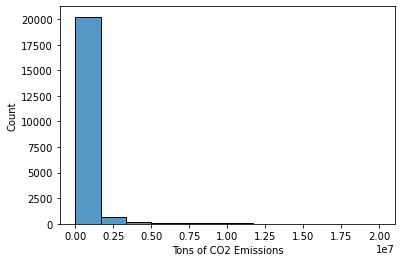

In [195]:
# Check for extreme values

sns.histplot(df['Tons of CO2 Emissions'], bins=12) 

In [196]:
# Check the mean

df['Tons of CO2 Emissions'].mean()

378563.74234514346

In [197]:
# Check the median

df['Tons of CO2 Emissions'].median()

7573.5

In [198]:
# Check the max

df['Tons of CO2 Emissions'].max()

20030555.0

### 3. Prepare data for regression analysis
#### Hypothesis: Greater generation of electricity means highr CO2 emissions

In [199]:
df.columns

Index(['Plant Code', 'Year', 'Plant Name', 'State', 'Sector Group',
       'Sector Code', 'Prime Mover', 'Fuel Code', 'Aggregated Fuel Group',
       'Generation (kWh)', 'Useful Thermal Output (MMBtu)',
       'Total Fuel Use (MMBtu)', 'Fuel Use(generate electric MMBtu)',
       'Fuel Use(useful thermal output MMBtu)', 'Fuel Consumed Qty',
       'Fuel Units', 'Tons of CO2 Emissions', 'CO2 Emissions Metric Tonnes',
       'NERC Region', 'Balancing Authority Code', 'Balancing Authority Name',
       'EIA Balancing Authority Region', 'Emission Levels'],
      dtype='object')

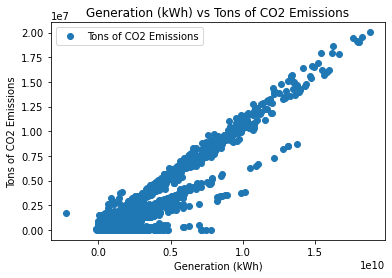

In [200]:
# Scatterplot showing how "Generation (kWh)" and "Tons of CO2 Emissions" variables correlate

df.plot(x = 'Generation (kWh)', y='Tons of CO2 Emissions', style='o')
plt.title('Generation (kWh) vs Tons of CO2 Emissions')  
plt.xlabel('Generation (kWh)')  
plt.ylabel('Tons of CO2 Emissions')  
plt.show()

It is clear to see the reltaively close relationship between the two variables, so greater generation of electricity seems to in fact mean greater higher CO2 emissions

In [201]:
# Convert the variables into NumPy arrays in separate objects (X and Y)

X = df['Generation (kWh)'].values.reshape(-1, 1)
Y = df['Tons of CO2 Emissions'].values.reshape(-1, 1)

In [202]:
# Review X (Generation (kWh))

X

array([[2918277000],
       [5483083000],
       [4278313064],
       ...,
       [  17681160],
       [  16792000],
       [  12421000]], dtype=int64)

In [203]:
# Review Y (Tons of CO2 Emissions)

Y

array([[  52374.        ],
       [3380728.        ],
       [4436536.        ],
       ...,
       [  34369.44611722],
       [  72107.70822166],
       [  57775.19125598]])

In [204]:
# Split data into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [205]:
# Regression object

regression = LinearRegression()

In [206]:
# Fit the regression object onto the training set

regression.fit(X_train, Y_train)

LinearRegression()

In [207]:
# Predict the values of Y using X

Y_predicted = regression.predict(X_test)

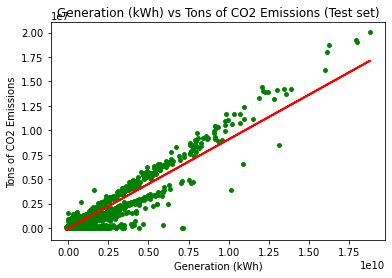

In [208]:
# A plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, Y_test, color='green', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =2)
plot_test.title('Generation (kWh) vs Tons of CO2 Emissions (Test set)')
plot_test.xlabel('Generation (kWh)')
plot_test.ylabel('Tons of CO2 Emissions')
plot_test.show()

The line of best fit appears to be a good fit with respect to the bulk of the data, however, there seems to be three separate linear correlations as well, perhaps the different sectors. This is something to be investigated further.

Below we see the r-squared of 0.886 which indicates that around 89% of the observed variations are explained by the model's inputs.

In [209]:
# Objects containing model summary statistics

rmse = mean_squared_error(Y_test, Y_predicted)
r2 = r2_score(Y_test, Y_predicted)

In [210]:
# Print the model summary statistics to evaluate the model's performance

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00091486]]
Mean squared error:  214894197842.47455
R2 score:  0.8864560135344888


In [211]:
# Review "Y_predicted"

Y_predicted

array([[-52831.41502857],
       [-67871.55822534],
       [-28871.2792097 ],
       ...,
       [-67752.75199709],
       [252929.76984263],
       [-67665.84046968]])

In [212]:
# A dataframe comparing the actual and predicted values of Y

data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(50).reset_index().sort_values([('Actual')], ascending = False)

,index,Actual,Predicted
19,19,1.067838e+07,9.258451e+06
10,10,5.603245e+06,4.796506e+06
21,21,1.387049e+06,1.968063e+06
26,26,9.979857e+05,1.183881e+06
17,17,5.250810e+05,6.121772e+05
13,13,4.393510e+05,5.871311e+05
38,38,2.931740e+05,3.873338e+05
22,22,2.456876e+05,2.404840e+05
12,12,2.177120e+05,1.896527e+05
7,7,2.167320e+05,1.779965e+05


##### Compare how the regression fits the training set

In [213]:
# Predict "X_train"

Y_predicted_train = regression.predict(X_train)

In [214]:
# Objects containing model summary statistics

rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [215]:
# Print the model summary statistics to evaluate the model's performance

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00091486]]
Mean squared error:  217619926453.06458
R2 score:  0.8849098226930321


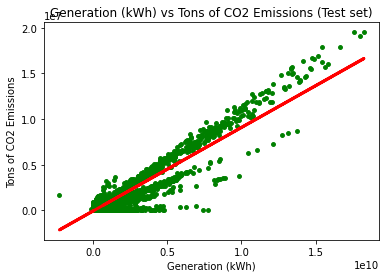

In [216]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Generation (kWh) vs Tons of CO2 Emissions (Test set)')
plot_test.xlabel('Generation (kWh)')
plot_test.ylabel('Tons of CO2 Emissions')
plot_test.show()

The line of best fit appears to be similar to the test set fit, however, there still seems to be three separate linear correlations as mentioned before, Perhaps a segmenting of the data will be appropriate.

The r-squared of 0.884 indicates that around 88% of the observed variations are explained by the model's inputs.

In [217]:
# Objects containing model summary statistics

rmse_ = mean_squared_error(Y_train, Y_predicted_train)
r2_ = r2_score(Y_train, Y_predicted_train)

In [218]:
# Print the model summary statistics to evaluate the model's performance

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse_)
print('R2 score: ', r2_)

Slope: [[0.00091486]]
Mean squared error:  217619926453.06458
R2 score:  0.8849098226930321
